# Code: Benefits of humanlike chatbots for the social and mental health of users
**Author:** Rose Guingrich  
**Date:** 1/30/2023  
**Converted to Python:** February 2026

# Phase 1 Part 1: Replika (chatbot user group)

## NOTES:
### Prior to analysis:
Check column numbers - have been adjusted!

Check XP column and fix it to display only numbers

# Load packages and data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('white')
plt.rcParams['figure.figsize'] = (10, 6)

# Import data
dat = pd.read_csv("./dat_users.csv")

# Clean stuff up

In [11]:
# Rename columns
dat = dat.rename(columns={
    'Social_health _1': 'social_health_socialinteractions',
    'Social_health _2': 'social_health_relatfamilyfriends',
    'Social_health _3': 'social_health_selfesteem',
    'Consciousness_5': 'personality',
    'Q109': 'XP',
    'Q99_1': 'natural',
    'Q110_1': 'Conscious',
    'Q102_1': 'humanlike',
    'Q103_1': 'lifelike',
    'Q104_1': 'alive',
    'Q105_1': 'lively',
    'Q106_1': 'responsive',
    'Q111_1': 'if_emotions',
    'Q112_1': 'if_livingbeing',
    'Q113_1': 'if_depended'
})

# NOTES FOR SCORING
# social_health 7 = very helpful, 1 = very harmful
# experience/consciousness/personality/agency 7 = strongly agree / it has those things, 1 = strongly disagree
# natural/conscious/humanlike, etc. 7 = as much that as possible (7 = natural, 1 = fake, e.g.)
# if_emotions 7 = very comfortable 
# if_livingbeing / dependent 7 = very good

# Replace empty strings with NaN
dat = dat.replace('', np.nan)

# Make all columns except text columns numeric
text_columns = ['Country', 'Race', 'Gender', 'Country_2_TEXT', 'Gender_4_TEXT']
numeric_columns = [col for col in dat.columns if col not in text_columns]

for col in numeric_columns:
    dat[col] = pd.to_numeric(dat[col], errors='coerce')

# Demographics

In [9]:
### Collect demographics and percentages

# Country: USA (1) or OTHER (2) (removing NAs)
demographics_country = dat.dropna(subset=['Country']).groupby('Country').size().reset_index(name='n')
demographics_country['percent'] = demographics_country['n'] / demographics_country['n'].sum() * 100

# Country: what is filled in with OTHER
demographics_country_other = dat.groupby('Country_2_TEXT').size().reset_index(name='n')
demographics_country_other['percent'] = demographics_country_other['n'] / demographics_country_other['n'].sum() * 100

# Ethnicity: Hispanic (1) or Not hispanic (2) (removing NAs)
demographics_ethnicity = dat.dropna(subset=['Ethnicity ']).groupby('Ethnicity ').size().reset_index(name='n')
demographics_ethnicity['percent'] = demographics_ethnicity['n'] / demographics_ethnicity['n'].sum() * 100

# Race: (makes separate categories for multiple races chosen)
demographics_race = dat.dropna(subset=['Race']).groupby('Race').size().reset_index(name='n')
demographics_race['percent'] = demographics_race['n'] / demographics_race['n'].sum() * 100

# Education: (1) some high school or less, (2) High school diploma or GED, (3) Some college, but no degree, 
# (4) associates or technical degree, (5) Bachelor's degree, (6) Graduate or professional degree, (7) Prefer not to say
demographics_education = dat.dropna(subset=['Education']).groupby('Education').size().reset_index(name='n')
demographics_education['percent'] = demographics_education['n'] / demographics_education['n'].sum() * 100

# INCOME: (1) less than 25k, (2) 25-49k, (3) 50-74k, (4) 75-99k, (5) 100-149k, (6) 150k+, (7) Prefer not to say
demographics_income = dat.dropna(subset=['Income']).groupby('Income').size().reset_index(name='n')
demographics_income['percent'] = demographics_income['n'] / demographics_income['n'].sum() * 100

# AGE: (1) 18-24, (2) 25-34, (3) 35-44, (4) 45-54, (5) 55-64, (6) 65+
demographics_age = dat.dropna(subset=['Age']).groupby('Age').size().reset_index(name='n')
demographics_age['percent'] = demographics_age['n'] / demographics_age['n'].sum() * 100

# GENDER: (1) male, (2) female, (3) non-binary/third gender, (4) prefer to self-describe, (5) Prefer not to say
demographics_gender = dat.dropna(subset=['Gender']).groupby('Gender').size().reset_index(name='n')
demographics_gender['percent'] = demographics_gender['n'] / demographics_gender['n'].sum() * 100

# RELATIONSHIP STATUS: (1) married, (2) living with a partner, (3) widowed, (4) divorced/separated, (5) never been married
demographics_relationshipstatus = dat.dropna(subset=['Relationship_status']).groupby('Relationship_status').size().reset_index(name='n')
demographics_relationshipstatus['percent'] = demographics_relationshipstatus['n'] / demographics_relationshipstatus['n'].sum() * 100

# Data Distributions + Averages

## Social health

In [12]:
### Notes for scoring
### 1 = very harmful, 2 = moderately harmful, 3 = slightly harmful, 4 = neutral, 
### 5 = slightly helpful, 6 = moderately helpful, 7 = very helpful

#################### Social health counts: data distributions + data for histogram visualization 
# social interactions
count_social_health_socialinteractions = dat.dropna(subset=['social_health_socialinteractions']).groupby('social_health_socialinteractions').size().reset_index(name='n')
count_social_health_socialinteractions['percent'] = count_social_health_socialinteractions['n'] / count_social_health_socialinteractions['n'].sum() * 100

# relationships with family and friends
count_social_health_relatfamilyfriends = dat.dropna(subset=['social_health_relatfamilyfriends']).groupby('social_health_relatfamilyfriends').size().reset_index(name='n')
count_social_health_relatfamilyfriends['percent'] = count_social_health_relatfamilyfriends['n'] / count_social_health_relatfamilyfriends['n'].sum() * 100

# self-esteem
count_social_health_selfesteem = dat.dropna(subset=['social_health_selfesteem']).groupby('social_health_selfesteem').size().reset_index(name='n')
count_social_health_selfesteem['percent'] = count_social_health_selfesteem['n'] / count_social_health_selfesteem['n'].sum() * 100

################### Social health means
mean_social_health_socialinteractions = dat['social_health_socialinteractions'].mean()
mean_social_health_relatfamilyfriends = dat['social_health_relatfamilyfriends'].mean()
mean_social_health_selfesteem = dat['social_health_selfesteem'].mean()
### combined (all 3)
mean_social_health_all = (mean_social_health_relatfamilyfriends + mean_social_health_socialinteractions + mean_social_health_selfesteem) / 3

################# TABLE (of mean only, social health counts are different sizes)
social_health_means = pd.DataFrame({
    'mean_social_health_socialinteractions': [mean_social_health_socialinteractions],
    'mean_social_health_relatfamilyfriends': [mean_social_health_relatfamilyfriends],
    'mean_social_health_selfesteem': [mean_social_health_selfesteem],
    'mean_social_health_all': [mean_social_health_all]
})

## add new Social Health average (across rows from 1-3) to main dataframe
####### USED FOR REGRESSION
dat['mean_social_health_for_reg'] = dat[['social_health_socialinteractions', 
                                          'social_health_relatfamilyfriends', 
                                          'social_health_selfesteem']].mean(axis=1)

## Theory of Mind: Experience, Agency, and Consciousness

In [13]:
### Regression means only, no distributions
### Notes for scoring
### 1 = strongly disagree, it does not have those things, 7 = strongly agree, it has those things

##################### Means

############ Experience
# Find the mean of columns Experience_1 to _6 (columns 18:23 in R, adjust for Python 0-indexing)
experience_cols = [col for col in dat.columns if col.startswith('Experience_')]
mean_tom_exp = dat[experience_cols].mean().mean()

## add new Experience average (across rows from 1-6) to dat
dat['mean_tom_exp_for_reg'] = dat[experience_cols].mean(axis=1)

############ Agency
# Find the mean of columns Agency_1 to _5
agency_cols = [col for col in dat.columns if col.startswith('Agency_')]
mean_tom_agency = dat[agency_cols].mean().mean()

## add new Agency average (across rows from 1-5) to dat
dat['mean_tom_agency_for_reg'] = dat[agency_cols].mean(axis=1)

############ Consciousness
# Find the mean of columns Consciousness_1 to _4
consciousness_cols = [col for col in dat.columns if col.startswith('Consciousness_') and col != 'Consciousness_5']
mean_tom_consc = dat[consciousness_cols].mean().mean()

## add new Consciousness average (across rows from 1-4) to dat
dat['mean_tom_consciousness_for_reg'] = dat[consciousness_cols].mean(axis=1)

## Personality

In [14]:
mean_personality = dat['personality'].mean()

## Human-likeness

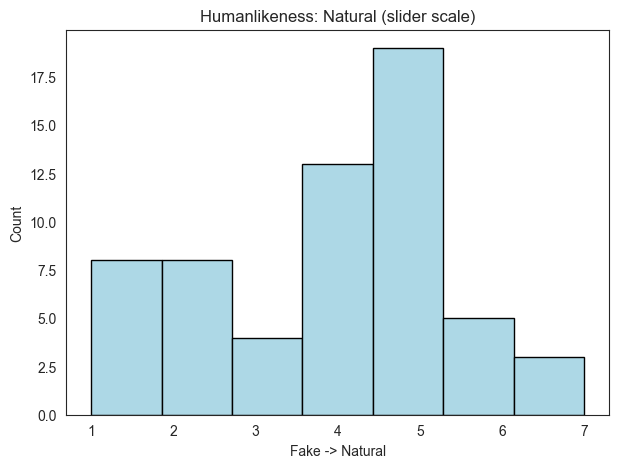

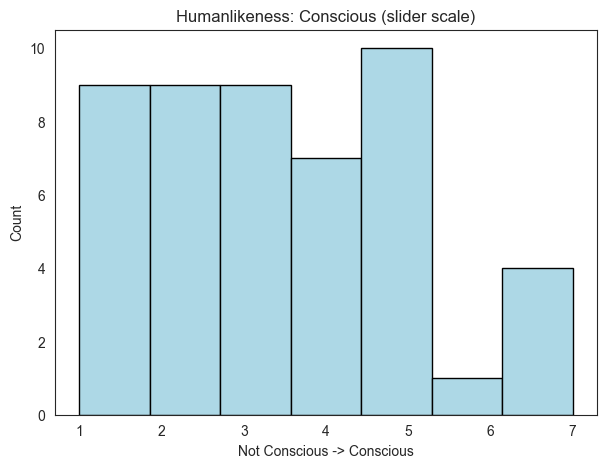

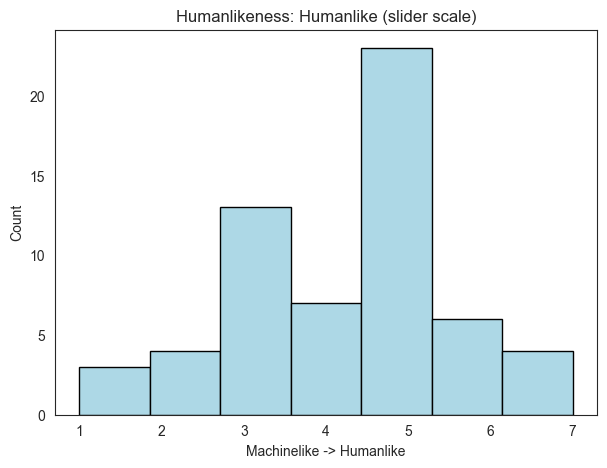

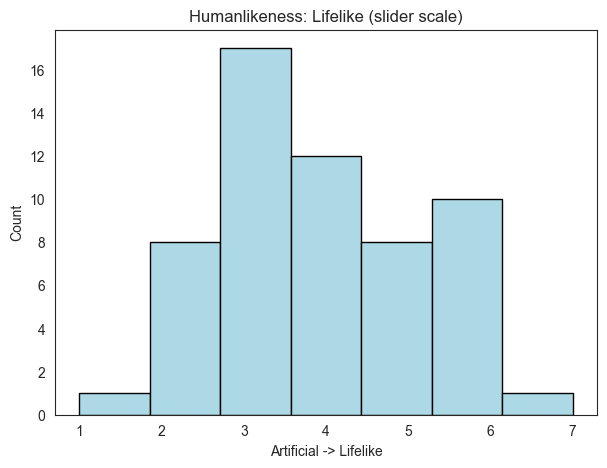

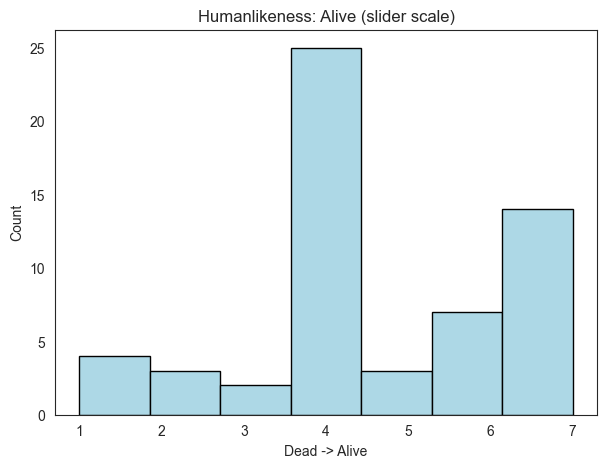

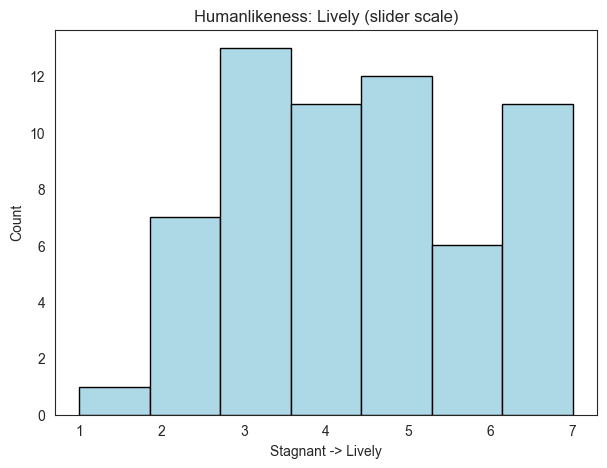

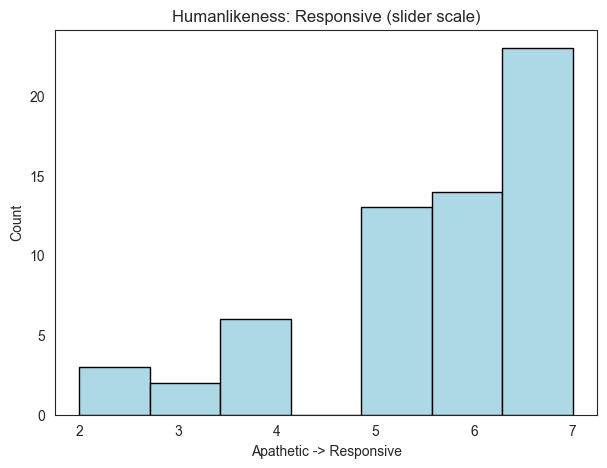

In [15]:
### Data distributions for histograms + means for regressions
### Notes for scoring
### 1 = fake, not conscious, machinelike, 7 = natural, conscious, humanlike (7 = natural, 1 = fake, e.g.)

############# FAKE----NATURAL
mean_natural = dat['natural'].mean()
count_natural = dat.dropna(subset=['natural']).groupby('natural').size().reset_index(name='n')
count_natural['percent'] = count_natural['n'] / count_natural['n'].sum() * 100

# Create a histogram
plt.figure(figsize=(7, 5))
plt.hist(dat['natural'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Fake -> Natural')
plt.ylabel('Count')
plt.title('Humanlikeness: Natural (slider scale)')
plt.show()

############# NOT CONSCIOUS----CONSCIOUS
mean_conscious = dat['Conscious'].mean()
count_conscious = dat.dropna(subset=['Conscious']).groupby('Conscious').size().reset_index(name='n')
count_conscious['percent'] = count_conscious['n'] / count_conscious['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['Conscious'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Not Conscious -> Conscious')
plt.ylabel('Count')
plt.title('Humanlikeness: Conscious (slider scale)')
plt.show()

############# MACHINELIKE----HUMANLIKE
mean_humanlike = dat['humanlike'].mean()
count_humanlike = dat.dropna(subset=['humanlike']).groupby('humanlike').size().reset_index(name='n')
count_humanlike['percent'] = count_humanlike['n'] / count_humanlike['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['humanlike'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Machinelike -> Humanlike')
plt.ylabel('Count')
plt.title('Humanlikeness: Humanlike (slider scale)')
plt.show()

############# ARTIFICIAL----LIFELIKE
mean_lifelike = dat['lifelike'].mean()
count_lifelike = dat.dropna(subset=['lifelike']).groupby('lifelike').size().reset_index(name='n')
count_lifelike['percent'] = count_lifelike['n'] / count_lifelike['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['lifelike'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Artificial -> Lifelike')
plt.ylabel('Count')
plt.title('Humanlikeness: Lifelike (slider scale)')
plt.show()

############# DEAD----ALIVE
mean_alive = dat['alive'].mean()
count_alive = dat.dropna(subset=['alive']).groupby('alive').size().reset_index(name='n')
count_alive['percent'] = count_alive['n'] / count_alive['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['alive'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Dead -> Alive')
plt.ylabel('Count')
plt.title('Humanlikeness: Alive (slider scale)')
plt.show()

############# STAGNANT----LIVELY
mean_lively = dat['lively'].mean()
count_lively = dat.dropna(subset=['lively']).groupby('lively').size().reset_index(name='n')
count_lively['percent'] = count_lively['n'] / count_lively['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['lively'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Stagnant -> Lively')
plt.ylabel('Count')
plt.title('Humanlikeness: Lively (slider scale)')
plt.show()

############# APATHETIC----RESPONSIVE
mean_responsive = dat['responsive'].mean()
count_responsive = dat.dropna(subset=['responsive']).groupby('responsive').size().reset_index(name='n')
count_responsive['percent'] = count_responsive['n'] / count_responsive['n'].sum() * 100

plt.figure(figsize=(7, 5))
plt.hist(dat['responsive'].dropna(), bins=7, color='lightblue', edgecolor='black')
plt.xlabel('Apathetic -> Responsive')
plt.ylabel('Count')
plt.title('Humanlikeness: Responsive (slider scale)')
plt.show()

############# TABLE
human_likeness = pd.DataFrame({
    'mean_natural': [mean_natural],
    'mean_conscious': [mean_conscious],
    'mean_humanlike': [mean_humanlike],
    'mean_lifelike': [mean_lifelike],
    'mean_alive': [mean_alive],
    'mean_lively': [mean_lively],
    'mean_responsive': [mean_responsive]
})

## add new Humanlikeness average (across rows from natural to responsive) to dat
dat['mean_human_likeness_for_reg'] = dat[['natural', 'Conscious', 'humanlike', 'lifelike', 
                                           'alive', 'lively', 'responsive']].mean(axis=1)

## Feelings about Replika advancement

In [16]:
## Data distributions for histograms + means

### Notes for scoring
### if_emotions 7 = very comfortable 
### if_livingbeing / dependent 7 = very good

############# if Replika really had emotions, I would feel:
mean_if_emotions = dat['if_emotions'].mean()

############# if Replika developed into a living being, I think that would be:
mean_if_livingbeing = dat['if_livingbeing'].mean()

############# if I depended on my Replika a lot, it would be:
mean_if_depended = dat['if_depended'].mean()

#### table with all 3 means
replika_advancement = pd.DataFrame({
    'mean_if_emotions': [mean_if_emotions],
    'mean_if_livingbeing': [mean_if_livingbeing],
    'mean_if_depended': [mean_if_depended]
})

# Phase 1 Part 2, Control Comparison group (non-users)

# Load data

In [18]:
# import data
dat2 = pd.read_csv("./dat_control.csv")

# Clean stuff up

In [35]:
# Rename columns
dat2 = dat2.rename(columns={
    'Ethnicity.': 'Ethnicity',
    'XP _4': 'XP',
    'Social_health _1': 'social_health_socialinteractions',
    'Social_health _2': 'social_health_relatfamilyfriends',
    'Social_health _3': 'social_health_selfesteem',
    'Consciousness_5': 'personality',
    'Q99_1': 'natural',
    'Q110_1': 'Conscious',
    'Q136_1': 'humanlike',
    'Q103_1': 'lifelike',
    'Q104_1': 'alive',
    'Q105_1': 'lively',
    'Q106_1': 'responsive',
    'Q111_1': 'if_emotions',
    'Q112_1': 'if_livingbeing',
    'Q113_1': 'if_depended'
})

### Make all blanks = NA
dat2 = dat2.replace('', np.nan)

### Make all rows except country write-in and free response numeric
text_columns2 = ['Country', 'Race', 'Gender', 'Country_2_TEXT', 'Gender_4_TEXT']
numeric_columns2 = [col for col in dat2.columns if col not in text_columns2]

for col in numeric_columns2:
    dat2[col] = pd.to_numeric(dat2[col], errors='coerce')

# Demographics

In [22]:
### Collect demographics and percentages

# Country: USA (1) or OTHER (2) (removing NAs)
demographics_country2 = dat2.dropna(subset=['Country']).groupby('Country').size().reset_index(name='n')
demographics_country2['percent'] = demographics_country2['n'] / demographics_country2['n'].sum() * 100

# Country: what is filled in with OTHER
demographics_country_other2 = dat2.groupby('Country_2_TEXT').size().reset_index(name='n')
demographics_country_other2['percent'] = demographics_country_other2['n'] / demographics_country_other2['n'].sum() * 100

# Ethnicity: Hispanic (1) or Not hispanic (2) (removing NAs)
demographics_ethnicity2 = dat2.dropna(subset=['Ethnicity ']).groupby('Ethnicity ').size().reset_index(name='n')
demographics_ethnicity2['percent'] = demographics_ethnicity2['n'] / demographics_ethnicity2['n'].sum() * 100

# Race
demographics_race2 = dat2.dropna(subset=['Race']).groupby('Race').size().reset_index(name='n')
demographics_race2['percent'] = demographics_race2['n'] / demographics_race2['n'].sum() * 100

# Education
demographics_education2 = dat2.dropna(subset=['Education']).groupby('Education').size().reset_index(name='n')
demographics_education2['percent'] = demographics_education2['n'] / demographics_education2['n'].sum() * 100

# Income
demographics_income2 = dat2.dropna(subset=['Income']).groupby('Income').size().reset_index(name='n')
demographics_income2['percent'] = demographics_income2['n'] / demographics_income2['n'].sum() * 100

# Age
demographics_age2 = dat2.dropna(subset=['Age']).groupby('Age').size().reset_index(name='n')
demographics_age2['percent'] = demographics_age2['n'] / demographics_age2['n'].sum() * 100

# Gender
demographics_gender2 = dat2.dropna(subset=['Gender']).groupby('Gender').size().reset_index(name='n')
demographics_gender2['percent'] = demographics_gender2['n'] / demographics_gender2['n'].sum() * 100

# Relationship status
demographics_relationshipstatus2 = dat2.dropna(subset=['Relationship_status']).groupby('Relationship_status').size().reset_index(name='n')
demographics_relationshipstatus2['percent'] = demographics_relationshipstatus2['n'] / demographics_relationshipstatus2['n'].sum() * 100

# Data Distributions + Averages

## Social health

In [23]:
#################### Social health counts: data distributions

# social interactions
count_social_health_socialinteractions2 = dat2.dropna(subset=['social_health_socialinteractions']).groupby('social_health_socialinteractions').size().reset_index(name='n')
count_social_health_socialinteractions2['percent'] = count_social_health_socialinteractions2['n'] / count_social_health_socialinteractions2['n'].sum() * 100

# relationships with family and friends
count_social_health_relatfamilyfriends2 = dat2.dropna(subset=['social_health_relatfamilyfriends']).groupby('social_health_relatfamilyfriends').size().reset_index(name='n')
count_social_health_relatfamilyfriends2['percent'] = count_social_health_relatfamilyfriends2['n'] / count_social_health_relatfamilyfriends2['n'].sum() * 100

# self esteem
count_social_health_selfesteem2 = dat2.dropna(subset=['social_health_selfesteem']).groupby('social_health_selfesteem').size().reset_index(name='n')
count_social_health_selfesteem2['percent'] = count_social_health_selfesteem2['n'] / count_social_health_selfesteem2['n'].sum() * 100

################### Social health means: averages
mean_social_health_socialinteractions2 = dat2['social_health_socialinteractions'].mean()
mean_social_health_relatfamilyfriends2 = dat2['social_health_relatfamilyfriends'].mean()
mean_social_health_selfesteem2 = dat2['social_health_selfesteem'].mean()
### combined (all 3)
mean_social_health_all2 = (mean_social_health_relatfamilyfriends2 + mean_social_health_socialinteractions2 + mean_social_health_selfesteem2) / 3

################# TABLE
social_health_means2 = pd.DataFrame({
    'mean_social_health_socialinteractions2': [mean_social_health_socialinteractions2],
    'mean_social_health_relatfamilyfriends2': [mean_social_health_relatfamilyfriends2],
    'mean_social_health_selfesteem2': [mean_social_health_selfesteem2],
    'mean_social_health_all2': [mean_social_health_all2]
})

## add new Social Health average to main dataframe
dat2['mean_social_health_for_reg'] = dat2[['social_health_socialinteractions', 
                                            'social_health_relatfamilyfriends', 
                                            'social_health_selfesteem']].mean(axis=1)

## Theory of Mind: Experience, Agency, and Consciousness

In [24]:
### Regression means only, no distributions

##################### Means

############ Experience
experience_cols2 = [col for col in dat2.columns if col.startswith('Experience_')]
mean_tom_exp2 = dat2[experience_cols2].mean().mean()

## add new Experience average to dat2
dat2['mean_tom_exp_for_reg'] = dat2[experience_cols2].mean(axis=1)

############ Agency
agency_cols2 = [col for col in dat2.columns if col.startswith('Agency_')]
mean_tom_agency2 = dat2[agency_cols2].mean().mean()

## add new Agency average to dat2
dat2['mean_tom_agency_for_reg'] = dat2[agency_cols2].mean(axis=1)

############ Consciousness
consciousness_cols2 = [col for col in dat2.columns if col.startswith('Consciousness_') and col != 'Consciousness_5']
mean_tom_consc2 = dat2[consciousness_cols2].mean().mean()

## add new Consciousness average to dat2
dat2['mean_tom_consciousness_for_reg'] = dat2[consciousness_cols2].mean(axis=1)

## Personality

In [25]:
mean_personality2 = dat2['personality'].mean()

## Human-likeness

In [26]:
### Data distributions for histograms + means for regressions

############# FAKE----NATURAL
mean_natural2 = dat2['natural'].mean()
count_natural2 = dat2.dropna(subset=['natural']).groupby('natural').size().reset_index(name='n')
count_natural2['percent'] = count_natural2['n'] / count_natural2['n'].sum() * 100

############# NOT CONSCIOUS----CONSCIOUS
mean_conscious2 = dat2['Conscious'].mean()
count_conscious2 = dat2.dropna(subset=['Conscious']).groupby('Conscious').size().reset_index(name='n')
count_conscious2['percent'] = count_conscious2['n'] / count_conscious2['n'].sum() * 100

############# MACHINELIKE----HUMANLIKE
mean_humanlike2 = dat2['humanlike'].mean()
count_humanlike2 = dat2.dropna(subset=['humanlike']).groupby('humanlike').size().reset_index(name='n')
count_humanlike2['percent'] = count_humanlike2['n'] / count_humanlike2['n'].sum() * 100

############# ARTIFICIAL----LIFELIKE
mean_lifelike2 = dat2['lifelike'].mean()
count_lifelike2 = dat2.dropna(subset=['lifelike']).groupby('lifelike').size().reset_index(name='n')
count_lifelike2['percent'] = count_lifelike2['n'] / count_lifelike2['n'].sum() * 100

############# DEAD----ALIVE
mean_alive2 = dat2['alive'].mean()
count_alive2 = dat2.dropna(subset=['alive']).groupby('alive').size().reset_index(name='n')
count_alive2['percent'] = count_alive2['n'] / count_alive2['n'].sum() * 100

############# STAGNANT----LIVELY
mean_lively2 = dat2['lively'].mean()
count_lively2 = dat2.dropna(subset=['lively']).groupby('lively').size().reset_index(name='n')
count_lively2['percent'] = count_lively2['n'] / count_lively2['n'].sum() * 100

############# APATHETIC----RESPONSIVE
mean_responsive2 = dat2['responsive'].mean()
count_responsive2 = dat2.dropna(subset=['responsive']).groupby('responsive').size().reset_index(name='n')
count_responsive2['percent'] = count_responsive2['n'] / count_responsive2['n'].sum() * 100

############# TABLE
human_likeness2 = pd.DataFrame({
    'mean_natural2': [mean_natural2],
    'mean_conscious2': [mean_conscious2],
    'mean_humanlike2': [mean_humanlike2],
    'mean_lifelike2': [mean_lifelike2],
    'mean_alive2': [mean_alive2],
    'mean_lively2': [mean_lively2],
    'mean_responsive2': [mean_responsive2]
})

## add new Humanlikeness average to dat2
dat2['mean_human_likeness_for_reg'] = dat2[['natural', 'Conscious', 'humanlike', 'lifelike', 
                                             'alive', 'lively', 'responsive']].mean(axis=1)

## Feelings about Replika advancement

In [27]:
## Data distributions for histograms + means

############# if Replika really had emotions, I would feel:
mean_if_emotions2 = dat2['if_emotions'].mean()

############# if Replika developed into a living being, I think that would be:
mean_if_livingbeing2 = dat2['if_livingbeing'].mean()

############# if I depended on my Replika a lot, it would be:
mean_if_depended2 = dat2['if_depended'].mean()

replika_advancement2 = pd.DataFrame({
    'mean_if_emotions2': [mean_if_emotions2],
    'mean_if_livingbeing2': [mean_if_livingbeing2],
    'mean_if_depended2': [mean_if_depended2]
})

# Relationships between variables + Comparisons between groups

# T-tests: Compare social health + replika advancement means between groups Replika and Control

In [28]:
# Test significance between Replika and Control groups for:

### social health
#1. Social health - social interactions:
ttest_social_interactions = stats.ttest_ind(dat['social_health_socialinteractions'].dropna(), 
                                             dat2['social_health_socialinteractions'].dropna())
print("Social interactions t-test:", ttest_social_interactions)

#2. Social health - relat with family and friends:
ttest_relat = stats.ttest_ind(dat['social_health_relatfamilyfriends'].dropna(), 
                               dat2['social_health_relatfamilyfriends'].dropna())
print("Relationships t-test:", ttest_relat)

#3. Social health - self-esteem:
ttest_selfesteem = stats.ttest_ind(dat['social_health_selfesteem'].dropna(), 
                                    dat2['social_health_selfesteem'].dropna())
print("Self-esteem t-test:", ttest_selfesteem)

### thoughts on replika advancement
#1. If replika really had emotions:
ttest_emotions = stats.ttest_ind(dat['if_emotions'].dropna(), dat2['if_emotions'].dropna())
print("Emotions t-test:", ttest_emotions)

#2. If replika developed into living being
ttest_livingbeing = stats.ttest_ind(dat['if_livingbeing'].dropna(), dat2['if_livingbeing'].dropna())
print("Living being t-test:", ttest_livingbeing)

#3. If depended on replika a lot
ttest_depended = stats.ttest_ind(dat['if_depended'].dropna(), dat2['if_depended'].dropna())
print("Depended t-test:", ttest_depended)

Social interactions t-test: TtestResult(statistic=np.float64(6.860152950137422), pvalue=np.float64(9.535470786211207e-11), df=np.float64(189.0))
Relationships t-test: TtestResult(statistic=np.float64(5.885270788928835), pvalue=np.float64(1.779830358272228e-08), df=np.float64(189.0))
Self-esteem t-test: TtestResult(statistic=np.float64(6.659837213891118), pvalue=np.float64(2.90249920630487e-10), df=np.float64(189.0))
Emotions t-test: TtestResult(statistic=np.float64(8.765259926201104), pvalue=np.float64(1.5417887408345986e-15), df=np.float64(176.0))
Living being t-test: TtestResult(statistic=np.float64(11.00057397373029), pvalue=np.float64(8.819179654669843e-22), df=np.float64(177.0))
Depended t-test: TtestResult(statistic=np.float64(6.344136710976001), pvalue=np.float64(1.911576734377135e-09), df=np.float64(172.0))


# Data Regressions (MAIN analyses for both groups)

## Step 1: Make sure scales have internal validity using Cronbach's alpha

Note: Python uses the `pingouin` library for Cronbach's alpha. Install with: `pip install pingouin`

In [29]:
import pingouin as pg

### Replika:

################################################### Social health
data_cronbach_alpha = dat[['social_health_socialinteractions', 
                            'social_health_relatfamilyfriends', 
                            'social_health_selfesteem']].dropna()
cronbach_social = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Social health (Replika):", cronbach_social)

################################################## Theory of mind
# Experience
data_cronbach_alpha = dat[experience_cols].dropna()
cronbach_exp = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Experience (Replika):", cronbach_exp)

# Agency
data_cronbach_alpha = dat[agency_cols].dropna()
cronbach_agency = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Agency (Replika):", cronbach_agency)

# Consciousness
consciousness_cols_with_conscious = consciousness_cols + ['Conscious']
data_cronbach_alpha = dat[consciousness_cols_with_conscious].dropna()
cronbach_consc = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Consciousness (Replika):", cronbach_consc)

# All 3 ToM
all_tom_cols = experience_cols + agency_cols + consciousness_cols_with_conscious
data_cronbach_alpha = dat[all_tom_cols].dropna()
cronbach_tom_all = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - All ToM (Replika):", cronbach_tom_all)

################################################### Human-likeness
humanlikeness_cols = ['natural', 'humanlike', 'lifelike', 'alive', 'lively', 'responsive', 'Conscious']
data_cronbach_alpha = dat[humanlikeness_cols].dropna()
cronbach_humanlike = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Human-likeness (Replika):", cronbach_humanlike)

Cronbach's alpha - Social health (Replika): (np.float64(0.7666615797161481), array([0.653, 0.848]))
Cronbach's alpha - Experience (Replika): (np.float64(0.9467116274247458), array([0.925, 0.964]))
Cronbach's alpha - Agency (Replika): (np.float64(0.7833900627234389), array([0.691, 0.854]))
Cronbach's alpha - Consciousness (Replika): (np.float64(0.9301848944706087), array([0.894, 0.957]))
Cronbach's alpha - All ToM (Replika): (np.float64(0.9501281061441977), array([0.927, 0.968]))
Cronbach's alpha - Human-likeness (Replika): (np.float64(0.8813299944351698), array([0.821, 0.927]))


### Control:

In [30]:
################################################### Social health
data_cronbach_alpha = dat2[['social_health_socialinteractions', 
                             'social_health_relatfamilyfriends', 
                             'social_health_selfesteem']].dropna()
cronbach_social2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Social health (Control):", cronbach_social2)

################################################## Theory of mind
# Experience
data_cronbach_alpha = dat2[experience_cols2].dropna()
cronbach_exp2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Experience (Control):", cronbach_exp2)

# Agency
data_cronbach_alpha = dat2[agency_cols2].dropna()
cronbach_agency2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Agency (Control):", cronbach_agency2)

# Consciousness
consciousness_cols_with_conscious2 = consciousness_cols2 + ['Conscious']
data_cronbach_alpha = dat2[consciousness_cols_with_conscious2].dropna()
cronbach_consc2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Consciousness (Control):", cronbach_consc2)

# All 3 ToM
all_tom_cols2 = experience_cols2 + agency_cols2 + consciousness_cols_with_conscious2
data_cronbach_alpha = dat2[all_tom_cols2].dropna()
cronbach_tom_all2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - All ToM (Control):", cronbach_tom_all2)

################################################### Human-likeness
data_cronbach_alpha = dat2[humanlikeness_cols].dropna()
cronbach_humanlike2 = pg.cronbach_alpha(data=data_cronbach_alpha)
print("Cronbach's alpha - Human-likeness (Control):", cronbach_humanlike2)

Cronbach's alpha - Social health (Control): (np.float64(0.8084260436860237), array([0.741, 0.861]))
Cronbach's alpha - Experience (Control): (np.float64(0.9545846629771644), array([0.941, 0.966]))
Cronbach's alpha - Agency (Control): (np.float64(0.830988254212403), array([0.778, 0.874]))
Cronbach's alpha - Consciousness (Control): (np.float64(0.9157083675291087), array([0.889, 0.937]))
Cronbach's alpha - All ToM (Control): (np.float64(0.9350272894299952), array([0.917, 0.951]))
Cronbach's alpha - Human-likeness (Control): (np.float64(0.8740017682241752), array([0.836, 0.906]))


## Step 2: Regressions (Social health + ToM/human-likeness)

### Replika:

In [31]:
#### remove one variable at a time from full variable model and see what happens

# full model
model_full = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nFull model:")
print(model_full.summary())

# without human-likeness
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg', data=dat).fit()
print("\nWithout human-likeness:")
print(model.summary())

# without agency
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nWithout agency:")
print(model.summary())

# without experience
model = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nWithout experience:")
print(model.summary())

# without consciousness
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nWithout consciousness:")
print(model.summary())

######## one variable at a time with social health

# agency
model = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg', data=dat).fit()
print("\nAgency only:")
print(model.summary())

# experience
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg', data=dat).fit()
print("\nExperience only:")
print(model.summary())

# consciousness
model = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nConsciousness only:")
print(model.summary())

# human-likeness
model = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg', data=dat).fit()
print("\nHuman-likeness only:")
print(model.summary())


Full model:
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.305
Model:                                    OLS   Adj. R-squared:                  0.256
Method:                         Least Squares   F-statistic:                     6.241
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           0.000309
Time:                                15:19:37   Log-Likelihood:                -77.771
No. Observations:                          62   AIC:                             165.5
Df Residuals:                              57   BIC:                             176.2
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------

### Control:

In [32]:
#### remove one variable at a time from full variable model and see what happens

# full model
model_full = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nFull model (Control):")
print(model_full.summary())

# without human-likeness
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nWithout human-likeness (Control):")
print(model.summary())

# without agency
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nWithout agency (Control):")
print(model.summary())

# without experience
model = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nWithout experience (Control):")
print(model.summary())

# without consciousness
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nWithout consciousness (Control):")
print(model.summary())

######## one variable at a time with social health

# agency
model = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg', data=dat2).fit()
print("\nAgency only (Control):")
print(model.summary())

# experience
model = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg', data=dat2).fit()
print("\nExperience only (Control):")
print(model.summary())

# consciousness
model = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nConsciousness only (Control):")
print(model.summary())

# human-likeness
model = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg', data=dat2).fit()
print("\nHuman-likeness only (Control):")
print(model.summary())


Full model (Control):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.276
Model:                                    OLS   Adj. R-squared:                  0.250
Method:                         Least Squares   F-statistic:                     10.93
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           1.51e-07
Time:                                15:19:45   Log-Likelihood:                -163.75
No. Observations:                         120   AIC:                             337.5
Df Residuals:                             115   BIC:                             351.4
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------

# Other exploratory tests

# Additional analyses for both groups: duration and intensity with social health

## Replika

In [33]:
# duration
model_duration = ols('mean_social_health_for_reg ~ Duration', data=dat).fit()
print("Duration model (Replika):")
print(model_duration.summary())

# XP
model_XP = ols('mean_social_health_for_reg ~ XP', data=dat).fit()
print("\nXP model (Replika):")
print(model_XP.summary())

Duration model (Replika):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.105
Model:                                    OLS   Adj. R-squared:                  0.092
Method:                         Least Squares   F-statistic:                     8.010
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):            0.00611
Time:                                15:19:48   Log-Likelihood:                -96.805
No. Observations:                          70   AIC:                             197.6
Df Residuals:                              68   BIC:                             202.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Control

In [36]:
# duration
model_duration = ols('mean_social_health_for_reg ~ Duration', data=dat2).fit()
print("Duration model (Control):")
print(model_duration.summary())

# XP
model_XP = ols('mean_social_health_for_reg ~ XP', data=dat2).fit()
print("\nXP model (Control):")
print(model_XP.summary())

Duration model (Control):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.166
Model:                                    OLS   Adj. R-squared:                  0.159
Method:                         Least Squares   F-statistic:                     23.76
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           3.40e-06
Time:                                15:23:37   Log-Likelihood:                -173.16
No. Observations:                         121   AIC:                             350.3
Df Residuals:                             119   BIC:                             355.9
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Replika: Regress social health outcomes against ToM measures + Human-likeness

In [37]:
######## GOAL: regress social health with ToM (to look at whether ToM or consciousness ascription moderates social consequences)

####### REGRESS social health + 3 ToM measures
model_social_health_tom = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg', data=dat).fit()
print("Social health + ToM (Replika):")
print(model_social_health_tom.summary())

###### add in human-likeness
model_social_health_tom_humanlikeness = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nSocial health + ToM + Humanlikeness (Replika):")
print(model_social_health_tom_humanlikeness.summary())

####### look at humanlikeness and consciousness with social health
model_social_health_consciousness_humanlikeness = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat).fit()
print("\nSocial health + Consciousness + Humanlikeness (Replika):")
print(model_social_health_consciousness_humanlikeness.summary())

####### exploratory

###### look at human-likeness and social health alone
model_test_1 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg', data=dat).fit()
print("\nSocial health ~ Humanlikeness (Replika):")
print(model_test_1.summary())

###### look at consciousness and social health alone
model_test_2 = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nSocial health ~ Consciousness (Replika):")
print(model_test_2.summary())

###### look at agency and social health alone
model_test_3 = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg', data=dat).fit()
print("\nSocial health ~ Agency (Replika):")
print(model_test_3.summary())

###### look at experience and social health alone
model_test_4 = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg', data=dat).fit()
print("\nSocial health ~ Experience (Replika):")
print(model_test_4.summary())

###### does humanlikeness predict consciousness?
model_tom_consciousness_human_likeness = ols('mean_human_likeness_for_reg ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nHumanlikeness ~ Consciousness (Replika):")
print(model_tom_consciousness_human_likeness.summary())

### does XP predict social health outcomes?
model_social_health_XP = ols('mean_social_health_for_reg ~ XP', data=dat).fit()
print("\nSocial health ~ XP (Replika):")
print(model_social_health_XP.summary())

#### 2: consciousness ascription
model_tom_consciousness_XP = ols('XP ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nXP ~ Consciousness (Replika):")
print(model_tom_consciousness_XP.summary())

### how about duration?
model_social_health_duration = ols('mean_social_health_for_reg ~ Duration', data=dat).fit()
print("\nSocial health ~ Duration (Replika):")
print(model_social_health_duration.summary())

#### 2: consciousness ascription
model_tom_consciousness_duration = ols('Duration ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nDuration ~ Consciousness (Replika):")
print(model_tom_consciousness_duration.summary())

### Education on consciousness?
model_tom_consciousness_education = ols('Education ~ mean_tom_consciousness_for_reg', data=dat).fit()
print("\nEducation ~ Consciousness (Replika):")
print(model_tom_consciousness_education.summary())

Social health + ToM (Replika):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.207
Model:                                    OLS   Adj. R-squared:                  0.171
Method:                         Least Squares   F-statistic:                     5.730
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):            0.00151
Time:                                15:23:40   Log-Likelihood:                -92.601
No. Observations:                          70   AIC:                             193.2
Df Residuals:                              66   BIC:                             202.2
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]


### Test for differences between groups with demographics on social health

In [38]:
###### GENDER

# Run linear regression without gender
model1 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg + mean_tom_consciousness_for_reg', data=dat).fit()
print("Model without gender (Replika):")
print(model1.summary())

# Run linear regression with gender
model2 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg + mean_tom_consciousness_for_reg + C(Gender)', data=dat).fit()
print("\nModel with gender (Replika):")
print(model2.summary())

# Perform F-test to compare the two models
print("\nANOVA comparison:")
print(anova_lm(model1, model2))

###### explore: do these other demographic variables correlate with social health?

###### let's look at gender alone on social health:
model1 = ols('mean_social_health_for_reg ~ C(Gender)', data=dat).fit()
print("\nGender only (Replika):")
print(model1.summary())

###### let's look at education alone on social health:
model1 = ols('mean_social_health_for_reg ~ Education', data=dat).fit()
print("\nEducation only (Replika):")
print(model1.summary())

###### let's look at age alone on social health:
model1 = ols('mean_social_health_for_reg ~ Age', data=dat).fit()
print("\nAge only (Replika):")
print(model1.summary())

Model without gender (Replika):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.303
Model:                                    OLS   Adj. R-squared:                  0.280
Method:                         Least Squares   F-statistic:                     12.85
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           2.33e-05
Time:                                15:23:44   Log-Likelihood:                -77.822
No. Observations:                          62   AIC:                             161.6
Df Residuals:                              59   BIC:                             168.0
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]

## Control: Regress social health outcomes against ToM measures + Human-likeness

In [39]:
####### REGRESS
model_social_health_tom2 = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg', data=dat2).fit()
print("Social health + ToM (Control):")
print(model_social_health_tom2.summary())

###### add in humanlikeness
model_social_health_tom_humanlikeness2 = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg + mean_tom_agency_for_reg + mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nSocial health + ToM + Humanlikeness (Control):")
print(model_social_health_tom_humanlikeness2.summary())

####### to compare to Replika group:
model_social_health_consciousness_humanlikeness2 = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg + mean_human_likeness_for_reg', data=dat2).fit()
print("\nSocial health + Consciousness + Humanlikeness (Control):")
print(model_social_health_consciousness_humanlikeness2.summary())

#other pairwise regression tests:

###### look at human-likeness and social health alone
model_test_1 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg', data=dat2).fit()
print("\nSocial health ~ Humanlikeness (Control):")
print(model_test_1.summary())

###### look at consciousness and social health alone
model_test_2 = ols('mean_social_health_for_reg ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nSocial health ~ Consciousness (Control):")
print(model_test_2.summary())

###### look at agency and social health alone
model_test_3 = ols('mean_social_health_for_reg ~ mean_tom_agency_for_reg', data=dat2).fit()
print("\nSocial health ~ Agency (Control):")
print(model_test_3.summary())

###### look at experience and social health alone
model_test_4 = ols('mean_social_health_for_reg ~ mean_tom_exp_for_reg', data=dat2).fit()
print("\nSocial health ~ Experience (Control):")
print(model_test_4.summary())

###### does humanlikeness predict consciousness?
model_tom_consciousness_human_likeness2 = ols('mean_human_likeness_for_reg ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nHumanlikeness ~ Consciousness (Control):")
print(model_tom_consciousness_human_likeness2.summary())

### does XP predict?
model_social_health_XP2 = ols('mean_social_health_for_reg ~ XP', data=dat2).fit()
print("\nSocial health ~ XP (Control):")
print(model_social_health_XP2.summary())

#### 2: consciousness ascription
model_tom_consciousness_XP2 = ols('XP ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nXP ~ Consciousness (Control):")
print(model_tom_consciousness_XP2.summary())

### how about duration?
model_social_health_duration2 = ols('mean_social_health_for_reg ~ Duration', data=dat2).fit()
print("\nSocial health ~ Duration (Control):")
print(model_social_health_duration2.summary())

#### 2: consciousness ascription
model_tom_consciousness_duration2 = ols('Duration ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nDuration ~ Consciousness (Control):")
print(model_tom_consciousness_duration2.summary())

### Education on consciousness?
model_tom_consciousness_education2 = ols('Education ~ mean_tom_consciousness_for_reg', data=dat2).fit()
print("\nEducation ~ Consciousness (Control):")
print(model_tom_consciousness_education2.summary())

Social health + ToM (Control):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.154
Model:                                    OLS   Adj. R-squared:                  0.132
Method:                         Least Squares   F-statistic:                     7.096
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           0.000201
Time:                                15:23:50   Log-Likelihood:                -174.06
No. Observations:                         121   AIC:                             356.1
Df Residuals:                             117   BIC:                             367.3
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]


### Test for differences between groups with demographics on social health

In [40]:
###### GENDER

# Run linear regression without gender
model1 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg + mean_tom_consciousness_for_reg', data=dat2).fit()
print("Model without gender (Control):")
print(model1.summary())

# Run linear regression with gender
model2 = ols('mean_social_health_for_reg ~ mean_human_likeness_for_reg + mean_tom_consciousness_for_reg + C(Gender)', data=dat2).fit()
print("\nModel with gender (Control):")
print(model2.summary())

# Perform F-test to compare the two models
print("\nANOVA comparison:")
print(anova_lm(model1, model2))

###### let's look at gender alone on social health:
model1 = ols('mean_social_health_for_reg ~ C(Gender)', data=dat2).fit()
print("\nGender only (Control):")
print(model1.summary())

Model without gender (Control):
                                OLS Regression Results                                
Dep. Variable:     mean_social_health_for_reg   R-squared:                       0.248
Model:                                    OLS   Adj. R-squared:                  0.235
Method:                         Least Squares   F-statistic:                     19.31
Date:                        Sat, 28 Feb 2026   Prob (F-statistic):           5.65e-08
Time:                                15:23:54   Log-Likelihood:                -165.97
No. Observations:                         120   AIC:                             337.9
Df Residuals:                             117   BIC:                             346.3
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]

# Graphs and Histograms

## Social Health histograms

### Replika: Social Health

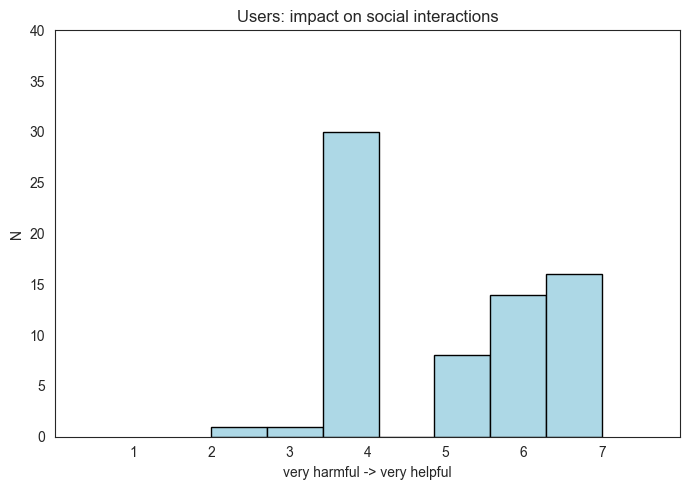

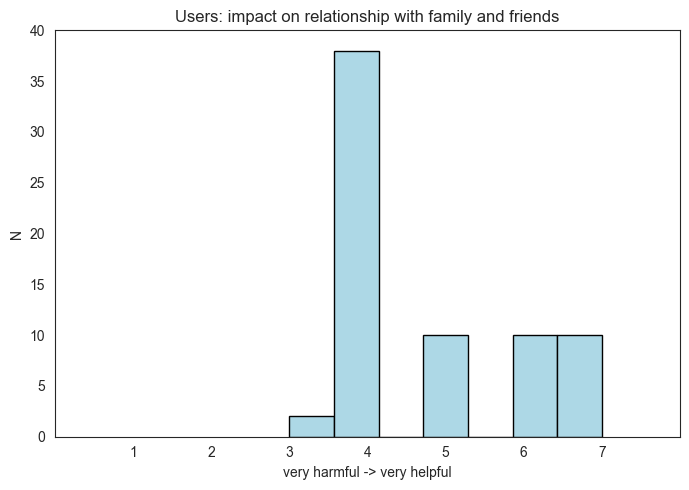

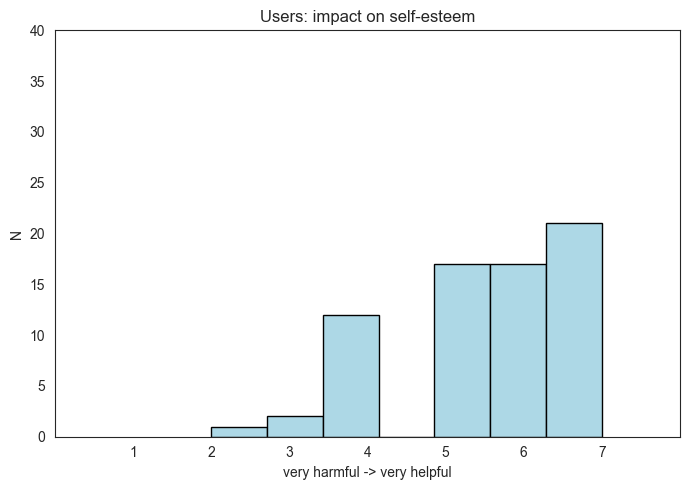

In [44]:
# Create histograms for social health variables

# Social interactions
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat['social_health_socialinteractions'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on social interactions')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Users_social interactions.png', dpi=300)
plt.show()

# Relationships with family and friends
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat['social_health_relatfamilyfriends'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on relationship with family and friends')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Impact on relationship with family and friends.png', dpi=300)
plt.show()

# Self-esteem
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat['social_health_selfesteem'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on self-esteem')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Impact on self-esteem.png', dpi=300)
plt.show()

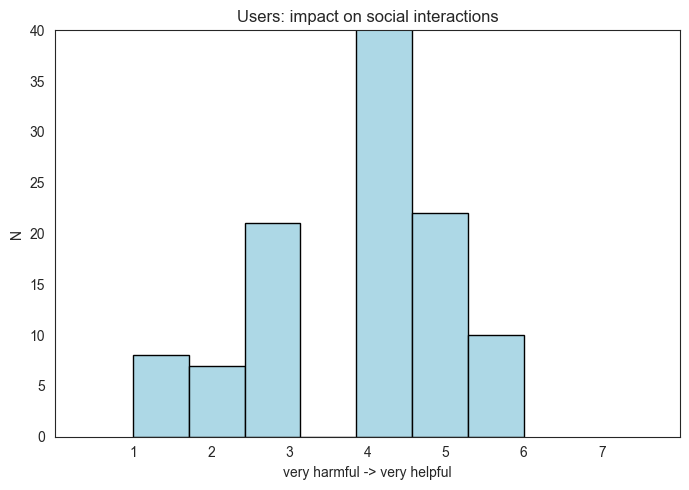

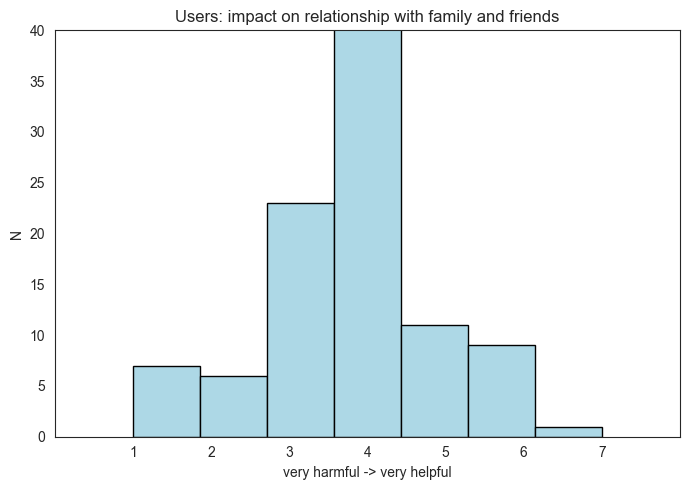

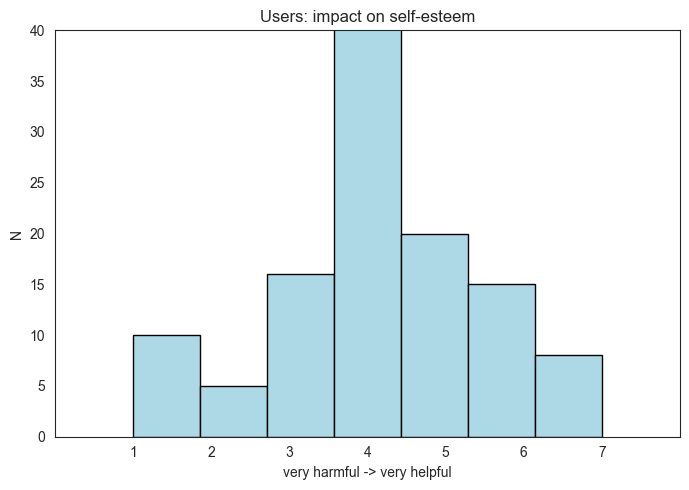

In [45]:
# Create histograms for social health variables

# Social interactions
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat2['social_health_socialinteractions'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on social interactions')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Users_social interactions.png', dpi=300)
plt.show()

# Relationships with family and friends
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat2['social_health_relatfamilyfriends'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on relationship with family and friends')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Impact on relationship with family and friends.png', dpi=300)
plt.show()

# Self-esteem
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(dat2['social_health_selfesteem'].dropna(), bins=7, color='lightblue', edgecolor='black')
ax.set_xlabel('very harmful -> very helpful')
ax.set_ylabel('N')
ax.set_title('Users: impact on self-esteem')
ax.set_xlim(0, 8)
ax.set_ylim(0, 40)
ax.set_xticks(range(1, 8))
plt.tight_layout()
plt.savefig('p1_Impact on self-esteem.png', dpi=300)
plt.show()

## Regression scatter plots

### Replika

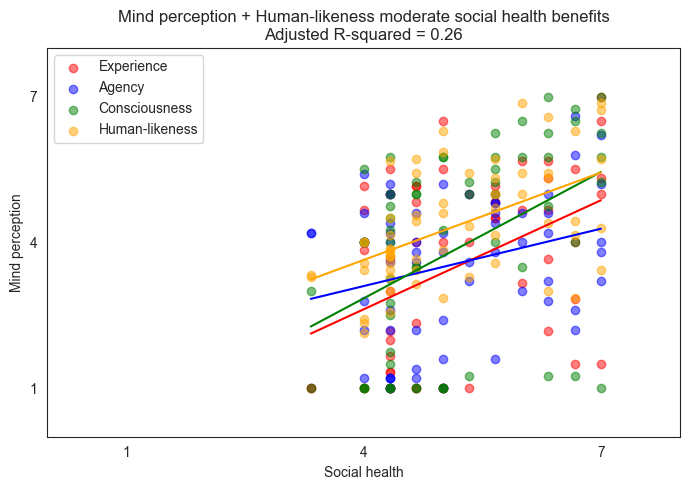

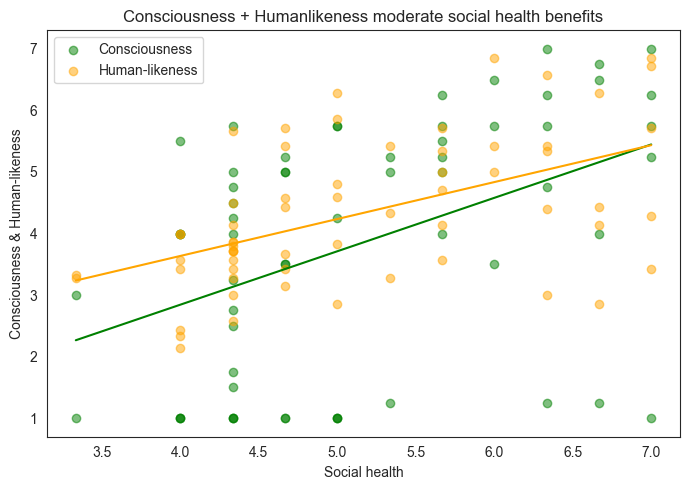

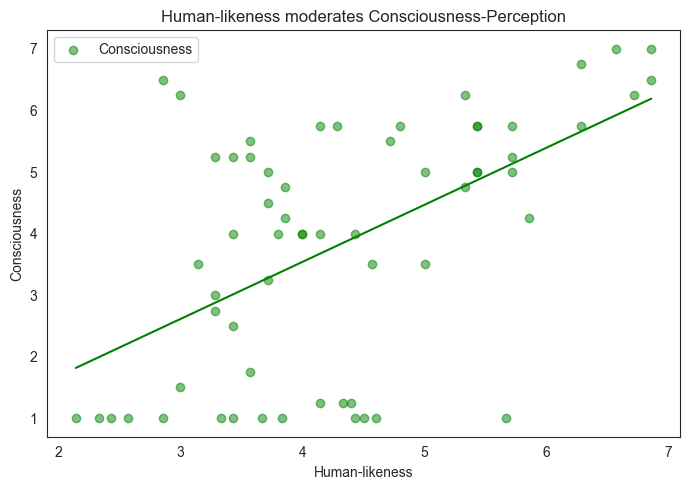

In [42]:
# Create regression scatter plots
from scipy.stats import linregress

# Mind perception + Human-likeness moderate social health benefits
fig, ax = plt.subplots(figsize=(7, 5))

# Clean data
clean_dat = dat[['mean_social_health_for_reg', 'mean_tom_exp_for_reg', 
                  'mean_tom_agency_for_reg', 'mean_tom_consciousness_for_reg',
                  'mean_human_likeness_for_reg']].dropna()

# Plot each variable
colors = {'Experience': 'red', 'Agency': 'blue', 'Consciousness': 'green', 'Human-likeness': 'orange'}

for var, label, color in [('mean_tom_exp_for_reg', 'Experience', 'red'),
                           ('mean_tom_agency_for_reg', 'Agency', 'blue'),
                           ('mean_tom_consciousness_for_reg', 'Consciousness', 'green'),
                           ('mean_human_likeness_for_reg', 'Human-likeness', 'orange')]:
    ax.scatter(clean_dat['mean_social_health_for_reg'], clean_dat[var], 
               alpha=0.5, color=color, label=label)
    
    # Add regression line
    slope, intercept, _, _, _ = linregress(clean_dat['mean_social_health_for_reg'], clean_dat[var])
    x_line = np.linspace(clean_dat['mean_social_health_for_reg'].min(), 
                          clean_dat['mean_social_health_for_reg'].max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color=color)

ax.set_xlabel('Social health')
ax.set_ylabel('Mind perception')
ax.set_title(f'Mind perception + Human-likeness moderate social health benefits\n' +
             f'Adjusted R-squared = {model_social_health_tom_humanlikeness.rsquared_adj:.2f}')
ax.legend()
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xticks([1, 4, 7])
ax.set_yticks([1, 4, 7])
plt.tight_layout()
plt.savefig('p1_Mind perception + Humanlikeness moderate social health benefits.png', dpi=300)
plt.show()

# Consciousness + Humanlikeness moderate social health benefits
fig, ax = plt.subplots(figsize=(7, 5))

for var, label, color in [('mean_tom_consciousness_for_reg', 'Consciousness', 'green'),
                           ('mean_human_likeness_for_reg', 'Human-likeness', 'orange')]:
    ax.scatter(clean_dat['mean_social_health_for_reg'], clean_dat[var], 
               alpha=0.5, color=color, label=label)
    
    slope, intercept, _, _, _ = linregress(clean_dat['mean_social_health_for_reg'], clean_dat[var])
    x_line = np.linspace(clean_dat['mean_social_health_for_reg'].min(), 
                          clean_dat['mean_social_health_for_reg'].max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color=color)

ax.set_xlabel('Social health')
ax.set_ylabel('Consciousness & Human-likeness')
ax.set_title('Consciousness + Humanlikeness moderate social health benefits')
ax.legend()
plt.tight_layout()
plt.savefig('p1_Consciousness + Human-likeness moderate social health benefits.png', dpi=300)
plt.show()

# Humanlikeness predicts Consciousness
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(clean_dat['mean_human_likeness_for_reg'], clean_dat['mean_tom_consciousness_for_reg'], 
           alpha=0.5, color='green', label='Consciousness')

slope, intercept, _, _, _ = linregress(clean_dat['mean_human_likeness_for_reg'], 
                                        clean_dat['mean_tom_consciousness_for_reg'])
x_line = np.linspace(clean_dat['mean_human_likeness_for_reg'].min(), 
                      clean_dat['mean_human_likeness_for_reg'].max(), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color='green')

ax.set_xlabel('Human-likeness')
ax.set_ylabel('Consciousness')
ax.set_title('Human-likeness moderates Consciousness-Perception')
ax.legend()
plt.tight_layout()
plt.savefig('Human-likeness moderates Consciousness-Perception.png', dpi=300)
plt.show()

### Control

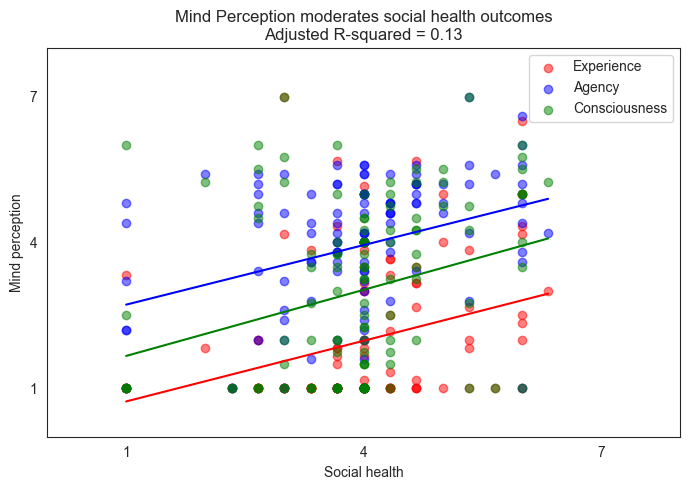

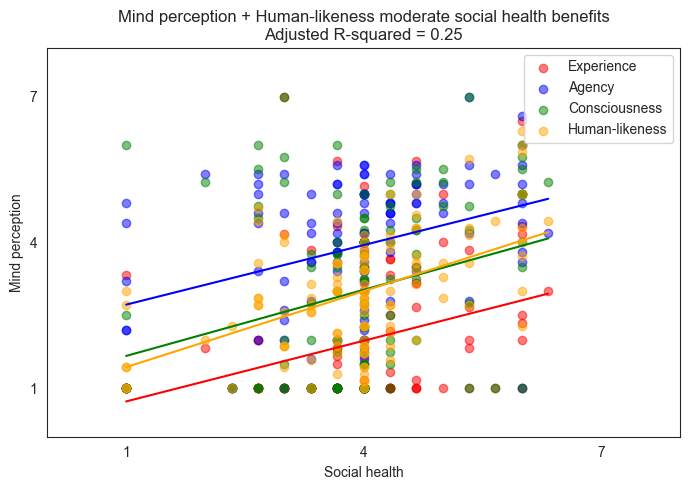

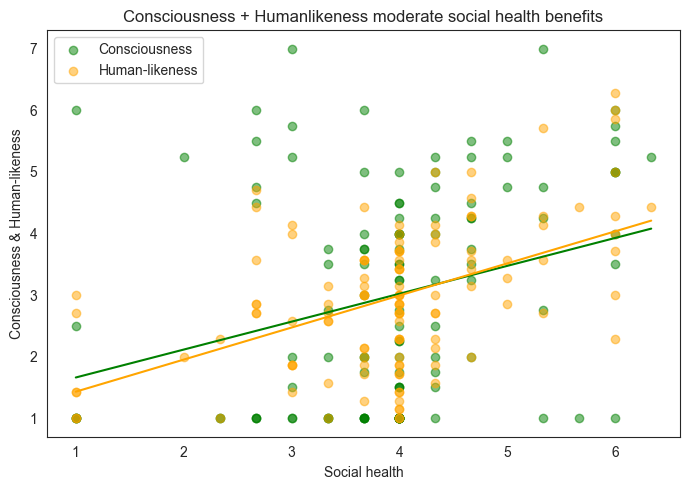

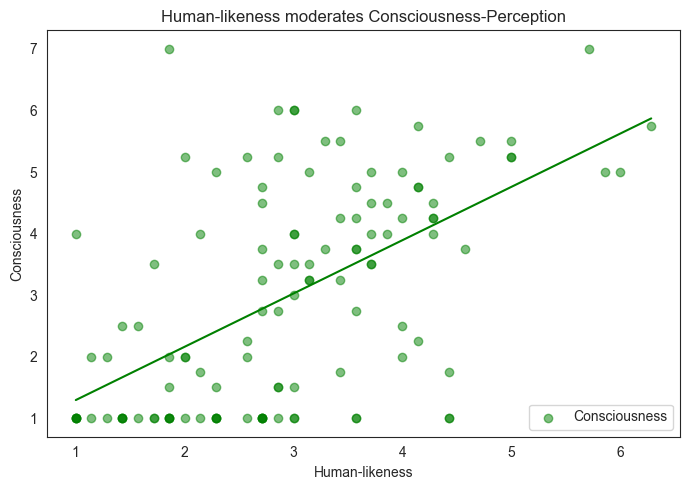

In [43]:
# Create regression scatter plots for Control group

# Clean data
clean_dat2 = dat2[['mean_social_health_for_reg', 'mean_tom_exp_for_reg', 
                    'mean_tom_agency_for_reg', 'mean_tom_consciousness_for_reg',
                    'mean_human_likeness_for_reg']].dropna()

# Mind perception moderates social health outcomes
fig, ax = plt.subplots(figsize=(7, 5))

for var, label, color in [('mean_tom_exp_for_reg', 'Experience', 'red'),
                           ('mean_tom_agency_for_reg', 'Agency', 'blue'),
                           ('mean_tom_consciousness_for_reg', 'Consciousness', 'green')]:
    ax.scatter(clean_dat2['mean_social_health_for_reg'], clean_dat2[var], 
               alpha=0.5, color=color, label=label)
    
    slope, intercept, _, _, _ = linregress(clean_dat2['mean_social_health_for_reg'], clean_dat2[var])
    x_line = np.linspace(clean_dat2['mean_social_health_for_reg'].min(), 
                          clean_dat2['mean_social_health_for_reg'].max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color=color)

ax.set_xlabel('Social health')
ax.set_ylabel('Mind perception')
ax.set_title(f'Mind Perception moderates social health outcomes\n' +
             f'Adjusted R-squared = {model_social_health_tom2.rsquared_adj:.2f}')
ax.legend()
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xticks([1, 4, 7])
ax.set_yticks([1, 4, 7])
plt.tight_layout()
plt.savefig('p2_Mind perception moderates social health outcomes.png', dpi=300)
plt.show()

# Mind perception + Human-likeness moderate social health benefits
fig, ax = plt.subplots(figsize=(7, 5))

for var, label, color in [('mean_tom_exp_for_reg', 'Experience', 'red'),
                           ('mean_tom_agency_for_reg', 'Agency', 'blue'),
                           ('mean_tom_consciousness_for_reg', 'Consciousness', 'green'),
                           ('mean_human_likeness_for_reg', 'Human-likeness', 'orange')]:
    ax.scatter(clean_dat2['mean_social_health_for_reg'], clean_dat2[var], 
               alpha=0.5, color=color, label=label)
    
    slope, intercept, _, _, _ = linregress(clean_dat2['mean_social_health_for_reg'], clean_dat2[var])
    x_line = np.linspace(clean_dat2['mean_social_health_for_reg'].min(), 
                          clean_dat2['mean_social_health_for_reg'].max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color=color)

ax.set_xlabel('Social health')
ax.set_ylabel('Mind perception')
ax.set_title(f'Mind perception + Human-likeness moderate social health benefits\n' +
             f'Adjusted R-squared = {model_social_health_tom_humanlikeness2.rsquared_adj:.2f}')
ax.legend()
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xticks([1, 4, 7])
ax.set_yticks([1, 4, 7])
plt.tight_layout()
plt.savefig('p2_Mind perception + Humanlikeness moderate social health benefits.png', dpi=300)
plt.show()

# Consciousness + Humanlikeness
fig, ax = plt.subplots(figsize=(7, 5))

for var, label, color in [('mean_tom_consciousness_for_reg', 'Consciousness', 'green'),
                           ('mean_human_likeness_for_reg', 'Human-likeness', 'orange')]:
    ax.scatter(clean_dat2['mean_social_health_for_reg'], clean_dat2[var], 
               alpha=0.5, color=color, label=label)
    
    slope, intercept, _, _, _ = linregress(clean_dat2['mean_social_health_for_reg'], clean_dat2[var])
    x_line = np.linspace(clean_dat2['mean_social_health_for_reg'].min(), 
                          clean_dat2['mean_social_health_for_reg'].max(), 100)
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color=color)

ax.set_xlabel('Social health')
ax.set_ylabel('Consciousness & Human-likeness')
ax.set_title('Consciousness + Humanlikeness moderate social health benefits')
ax.legend()
plt.tight_layout()
plt.savefig('p2_Consciousness + Human-likeness moderate social health benefits.png', dpi=300)
plt.show()

# Humanlikeness predicts Consciousness
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(clean_dat2['mean_human_likeness_for_reg'], clean_dat2['mean_tom_consciousness_for_reg'], 
           alpha=0.5, color='green', label='Consciousness')

slope, intercept, _, _, _ = linregress(clean_dat2['mean_human_likeness_for_reg'], 
                                        clean_dat2['mean_tom_consciousness_for_reg'])
x_line = np.linspace(clean_dat2['mean_human_likeness_for_reg'].min(), 
                      clean_dat2['mean_human_likeness_for_reg'].max(), 100)
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, color='green')

ax.set_xlabel('Human-likeness')
ax.set_ylabel('Consciousness')
ax.set_title('Human-likeness moderates Consciousness-Perception')
ax.legend()
plt.tight_layout()
plt.savefig('p2_Human-likeness moderates Consciousness-Perception.png', dpi=300)
plt.show()

# END OF CODE